In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [4]:
data = pd.read_csv('CardioGoodFitness.csv')

In [5]:
# Creating a copy of the dataset
df = data.copy()

### Viewing the first & last 5 rows

In [6]:
# Displaying first 5 rows of the dataset 
# Head function is used for this purpose
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [7]:
# Displaying last 5 rows of the dataset 
# Tail function is used for this purpose
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


### Viewing the shape of the dataset

In [8]:
# Checking the shape of the data set 
# Shape denotes the number of (rows x coloumns) in the dataset
df.shape

(180, 9)

### Check the data types of the columns for the dataset

In [9]:
# Checking the data types of each feature provided in the dataset
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

* Observed that there are possible categorical fetures

In [10]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


### Updating datatypes of features

In [11]:
num_col = df.select_dtypes(include='number')
cat_col = df.select_dtypes(include='object')

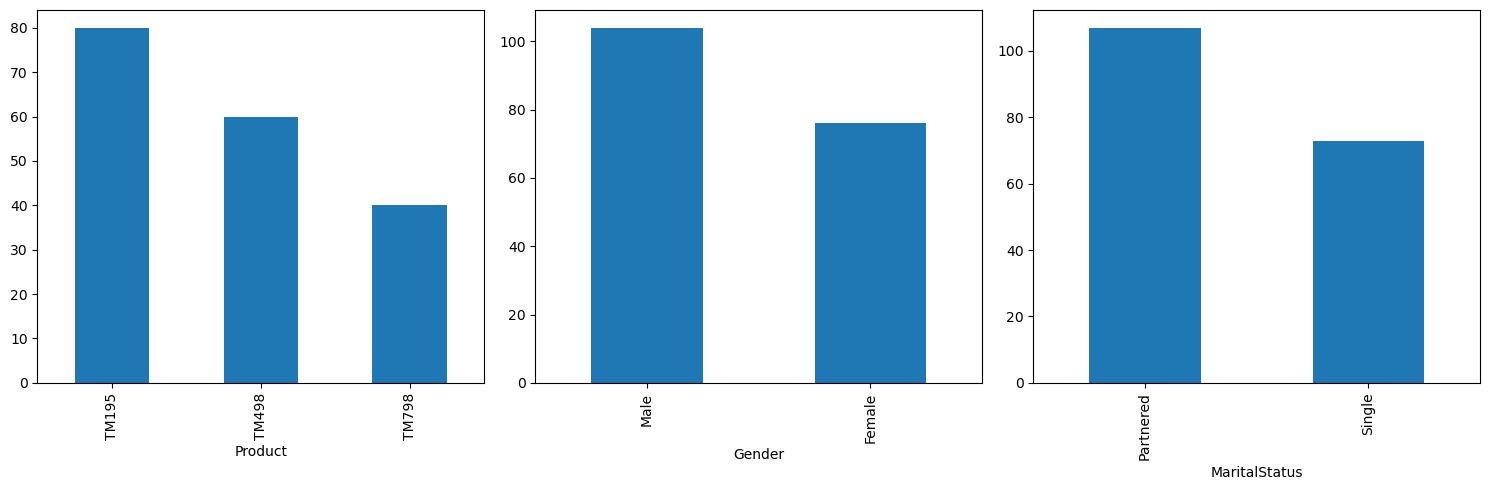

In [12]:
plt.figure(figsize=(15,5))

for i, column in enumerate(cat_col,1):
    plt.subplot(1,3,i)
    data[column].value_counts().plot(kind='bar')

plt.tight_layout()
plt.show()

Since they are all categories, we can convert the obeject data type to categorical

In [13]:
for i in df.select_dtypes(include='object').columns:
    df[i] = df[i].astype('category')

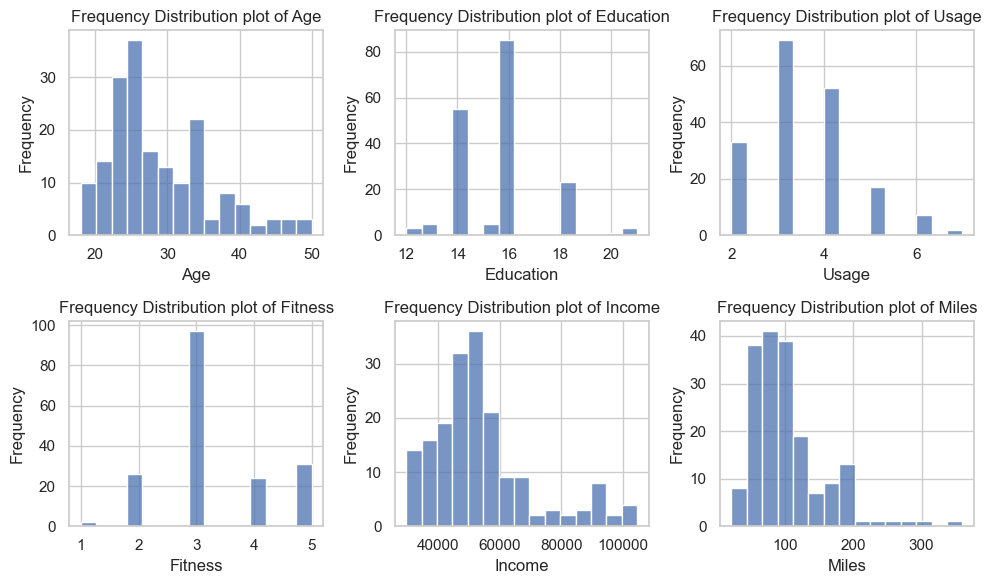

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

for i,column in enumerate(num_col,1):
    plt.subplot(2,3,i)
    sns.histplot(data[column],kde=False,bins=15)
    plt.title(f"Frequency Distribution plot of {column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The column Fitness indicates that it is categorical and not integer since the values are discrete and not continuous.

In [15]:
df['Fitness'] = df.Fitness.astype('category')

In [16]:
df.dtypes

Product          category
Age                 int64
Gender           category
Education           int64
MaritalStatus    category
Usage               int64
Fitness          category
Income              int64
Miles               int64
dtype: object

In [17]:
df.describe()

,Age,Education,Usage,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,53719.577778,103.194444
std,6.943498,1.617055,1.084797,16506.684226,51.863605
min,18.000000,12.000000,2.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,104581.000000,360.000000


- For the columns Age, Usage, Income and Miles, there seems to be a big difference in their mean and median. This indicates that there is right skewness since mean is greater
- Education has approximately the same mean and median so there is no skewness
- Customers range from 18 to 50, with a mean age of approximately 29
- The usage indicates that the customers use the treadmill atleast thrice a week and ranges from 2 to 7.
- Customers expect to run between 21 to 360 miles, with an average of around 103 miles.

In [18]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

* There are no null values in the dataset provided and hence no additional preprocessing required
* However, to confirm we will also use .info()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    category
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(4), int64(5)
memory usage: 8.4 KB


This confirms that there are no null values in our dataset.

### Exploratory Data Analysis

#### Univariate Analysis

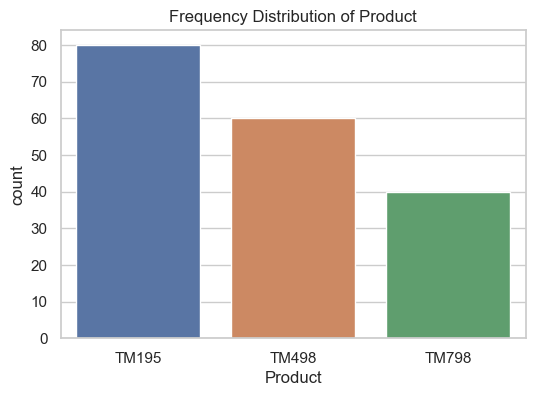

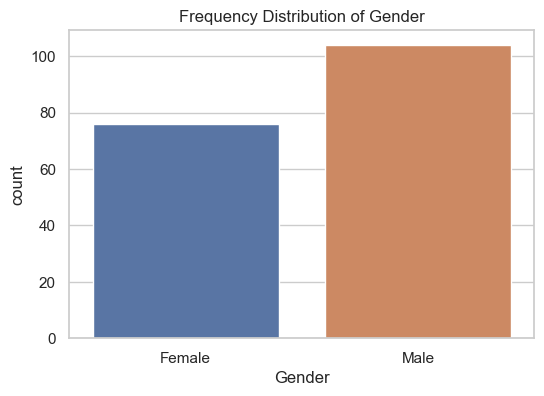

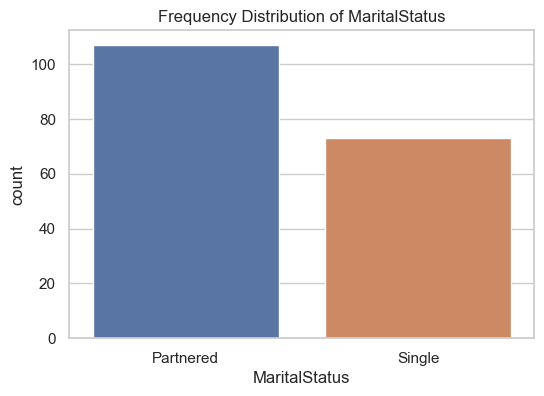

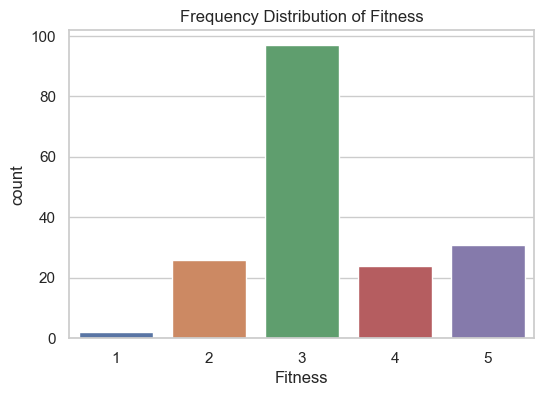

In [20]:
## Univariate analysis on categorical columns

cat_col = df.select_dtypes(include='category').columns.to_list()

for col in cat_col:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f'Frequency Distribution of {col}')
    plt.show()


In [21]:
df['Product'].value_counts(normalize=True)*100

Product
TM195    44.444444
TM498    33.333333
TM798    22.222222
Name: proportion, dtype: float64

In [22]:
df['Gender'].value_counts(normalize=True)*100

Gender
Male      57.777778
Female    42.222222
Name: proportion, dtype: float64

In [23]:
df['MaritalStatus'].value_counts(normalize=True)*100

MaritalStatus
Partnered    59.444444
Single       40.555556
Name: proportion, dtype: float64

In [24]:
df['Fitness'].value_counts(normalize=True)*100

Fitness
3    53.888889
5    17.222222
2    14.444444
4    13.333333
1     1.111111
Name: proportion, dtype: float64

## Univariate Analysis on Numerical Columns

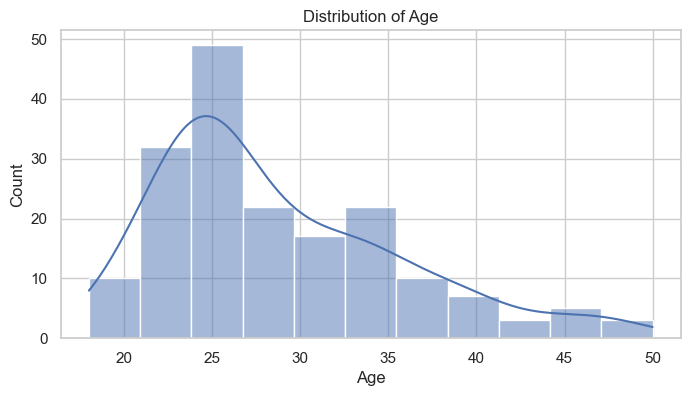

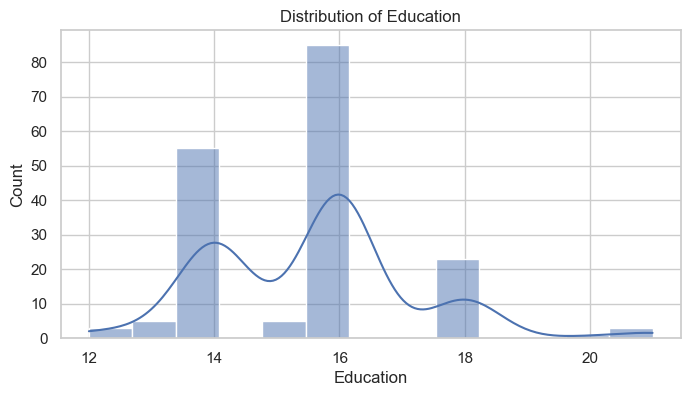

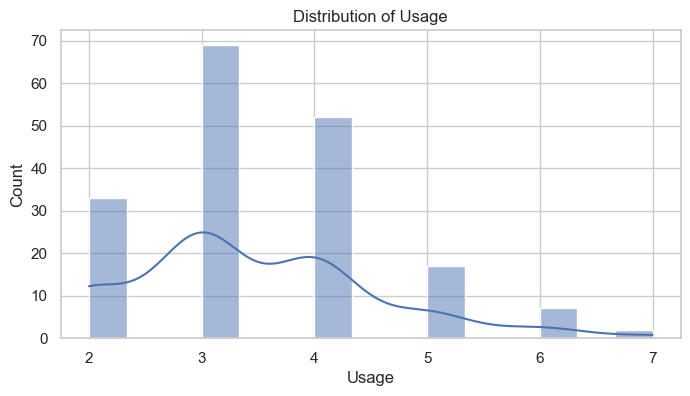

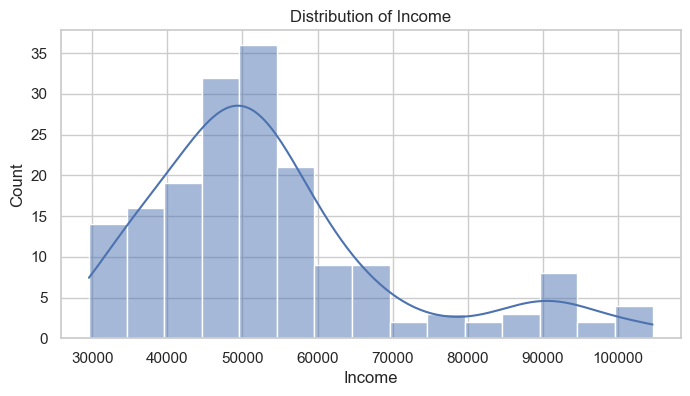

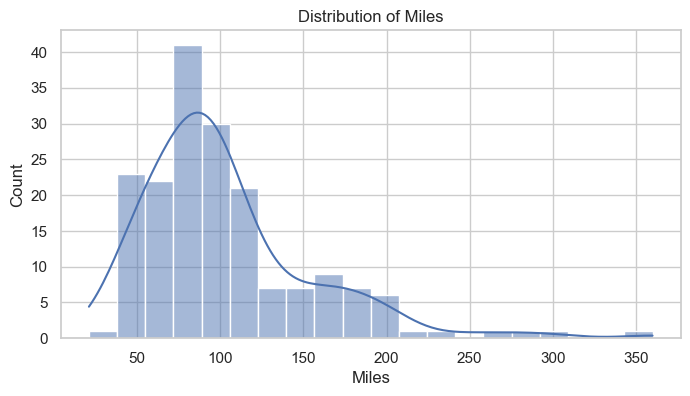

In [25]:
num_col = df.select_dtypes(include='number').columns.to_list()

for col in num_col:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col],kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

#### Outlier Analysis

In [26]:
for i in df.select_dtypes(include='number'):
    print(i , df[i].skew())

Age 0.9821608255301499
Education 0.6222941428985225
Usage 0.7394944961814618
Income 1.2917845606896028
Miles 1.7244965928707188


- If skewness is less than -1 or greater than 1, the distribution is highly skewed. 
- If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
- If skewness is between -0.5 and 0.5, the distribution is not skewed.

Therefore, this scenario:
- Age, with a skewness of 0.982, is positivley skewed.
- Education, with a skewness of 0.622, is moderately skewed but less than other columns. 
- Usage, with a skewness of 0.739, indicates a moderate positive skewness.
- Income, with a skewness of 1.29, shows that the distribution is positively skewed. This can be considered a high skewness.
- Miles, with a skewness of 1.79, indcicates that the distribution is again positively skewed and similar to Income, it is highly skewed. 

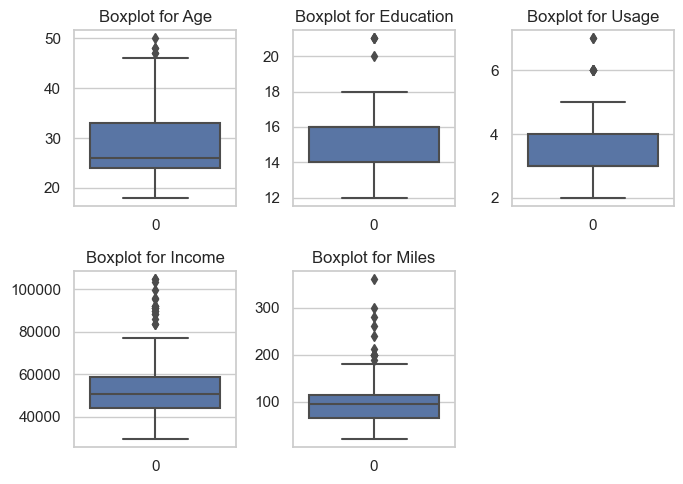

In [27]:
plt.figure(figsize=(7,5))

for i, col in enumerate(df.select_dtypes(include='number'),1):
    plt.subplot(2,3,i)
    sns.boxplot(data[col])
    plt.title(f'Boxplot for {col}')

plt.tight_layout()
plt.show()

The box plot visually confirms the outliers in each columns. Now, though the objective is to provide a customer profile, univariate and bivaraite analysis, outliers could be very useful to generate insights as well since they provide more details about the niche customers that are utilizing this product. However, we decided to also provide a function to remove the outliers  from the dataset so that it is ready for further analysis and modelling if and when required.

In [28]:
def handling_outliers(col):
    Q1 = col.quantile(0.25) #  First quartile or 25% percentile
    Q3 = col.quantile(0.75)  # Third quartile or 75% percentile
    IQR = Q3 - Q1 #  Interquartile Range (IQR)
    Upper_Limit = Q3 + 1.5 * IQR # Calculation of upper limit
    Lower_Limit = Q1 - 1.5 * IQR # Calculation of lower limit
    col = col.apply(lambda x: Upper_Limit if x > Upper_Limit else Lower_Limit if x < Lower_Limit else x ) # we go through each row and check if
    # is greater than the upper limit or lower than the lower limit or not and replace them with the same values if they are.
    return col 

In [29]:
## We will create a copy of the dataset to remove the outliers and show the output for the same. 

df2 = df.copy()

# Now since we know all numerical columns are either moderately orhighly skewed. We run through each column and convert accordingly
num_col = df.select_dtypes(include='number').columns.to_list()

for i in num_col:
    df2[i] = handling_outliers(df2[i]) # for loop to run  the function on each column of numerical data and convert the outliers

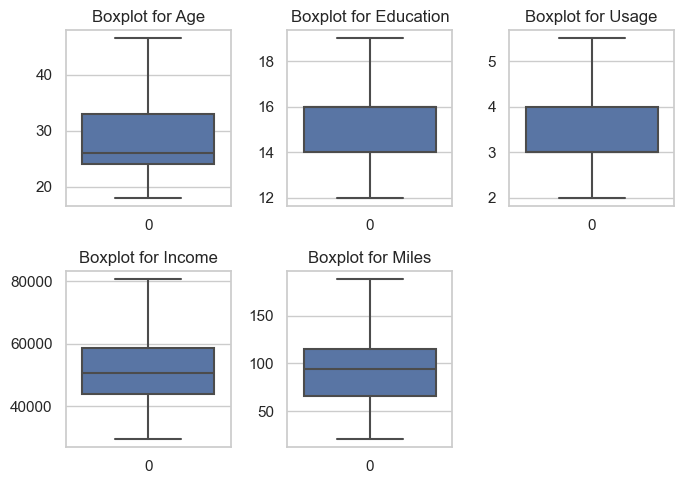

In [30]:
plt.figure(figsize=(7,5))

for i, col in enumerate(df2.select_dtypes(include='number'),1):
    plt.subplot(2,3,i)
    sns.boxplot(df2[col])
    plt.title(f'Boxplot for {col}')

plt.tight_layout()
plt.show()

The box plot again shows how we can remove all the outliers and visually confirms it.

## Bivariate Analysis

* Miles is highly correlated with usage, a customer running more miles would mean he is also using the treadmill more. 
* Education and Income has a positive correlation, indicating higher the education higher would be the income.
* Income shows a positive correlation with Age , Usage, and Miles.
* A positive correlation between age and income is expected but a high poistive correlation of income with usage and miles should be investigated further.

* We can see varying distributions in variables for different products, we should investigate it further.

## Product vs Age

Scatterplt

Text(0, 0.5, 'Age')

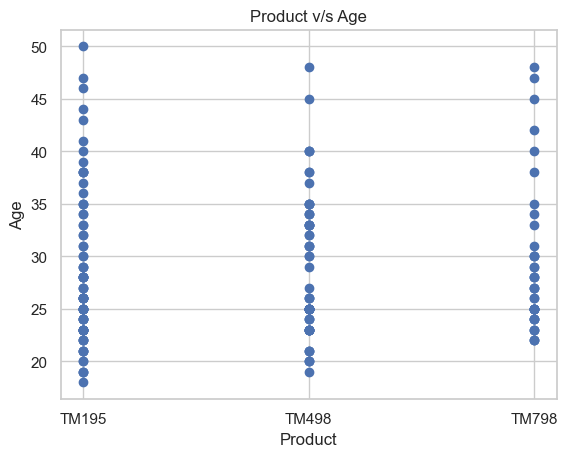

In [31]:
plt.scatter(df.Product, df.Age)
plt.title("Product v/s Age")
plt.xlabel("Product")
plt.ylabel("Age")

Barplot

<Axes: xlabel='Product', ylabel='Age'>

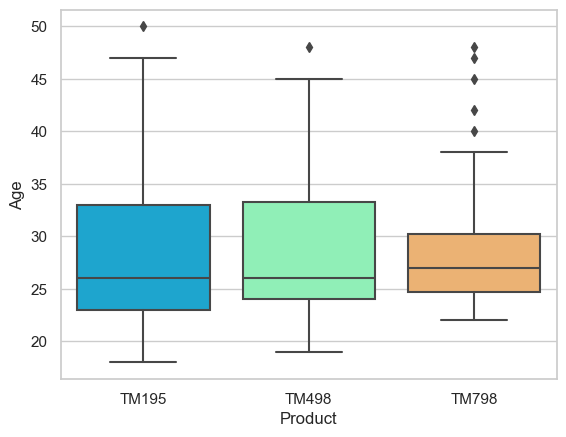

In [32]:
sns.boxplot(x=df.Product, y=df.Age, data=df, palette="rainbow")

* TM195 and TM498 are preferred by customers of all ages but for TM798 customers are in the range of above 22 and below 38 (but there are some outliers)

## Income Distribution by Product

Boxplot

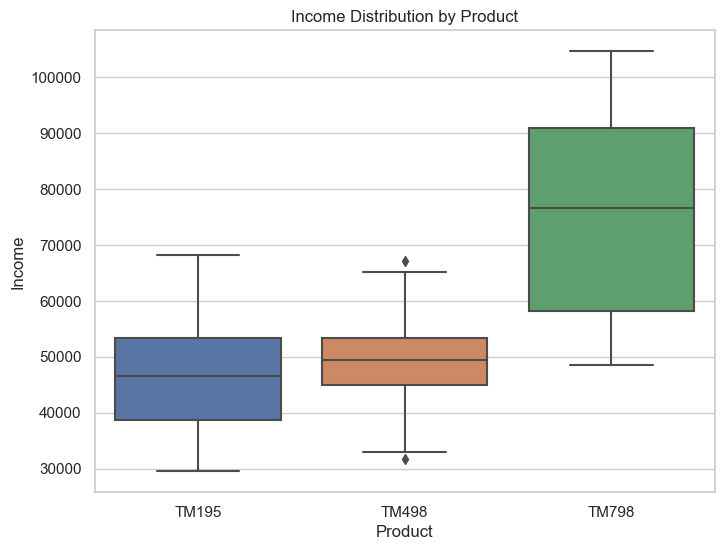

In [33]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Product',y='Income',data=df)
plt.title('Income Distribution by Product')
plt.show()

Scatterplot

Text(0, 0.5, 'Income')

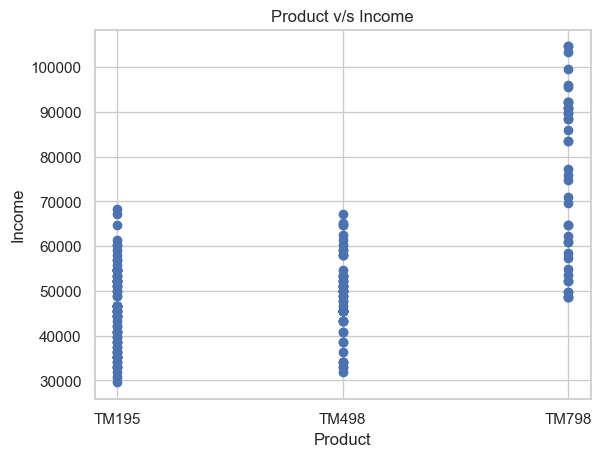

In [34]:
plt.scatter(df.Product, df.Income)
plt.title("Product v/s Income")
plt.xlabel("Product")
plt.ylabel("Income")

* Customers with higher income prefer TM798, whereas TM195 and TM498 are prefered by middle income customers.

## Product vs Education

Scatterplot

Text(0, 0.5, 'Education')

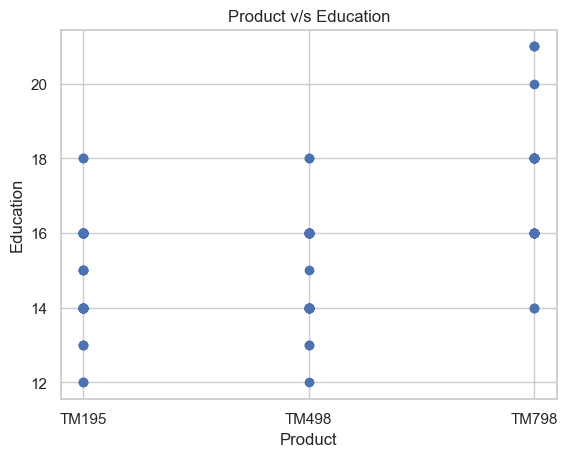

In [35]:
plt.scatter(df.Product, df.Education)
plt.title("Product v/s Education")
plt.xlabel("Product")
plt.ylabel("Education")

Boxplot

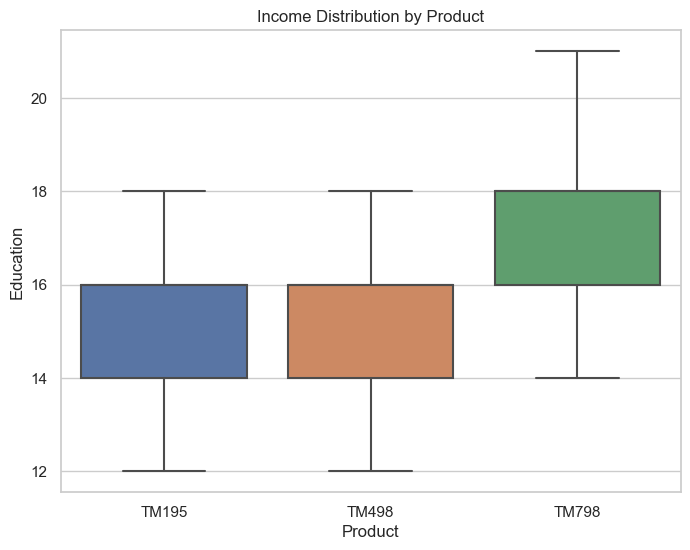

In [36]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Product',y='Education',data=df)
plt.title('Income Distribution by Product')
plt.show()

* Customers buying TM798 have higher education as compared to the customers buying the other two other products

## Product vs Usage

Text(0, 0.5, 'Usage')

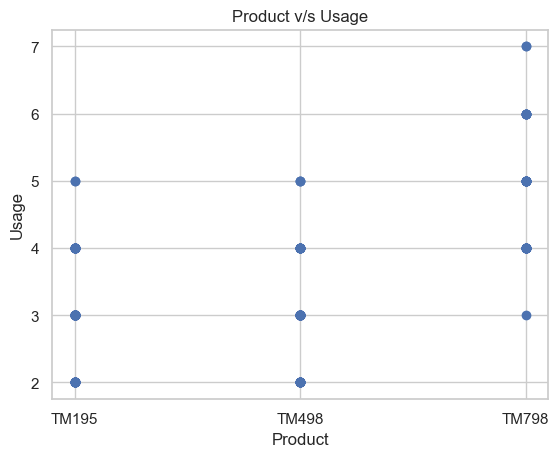

In [37]:
plt.scatter(df.Product, df.Usage)
plt.title("Product v/s Usage")
plt.xlabel("Product")
plt.ylabel("Usage")

* Customers who have higher expected treadmill usage(greater than 3 days) prefer the TM798 product, Customers with very light(2-3 days) usage prefer TM498, customers who have moderate usage (greater than 2 days but less than or equal to 5 days) prefer TM195.

## Product vs Miles

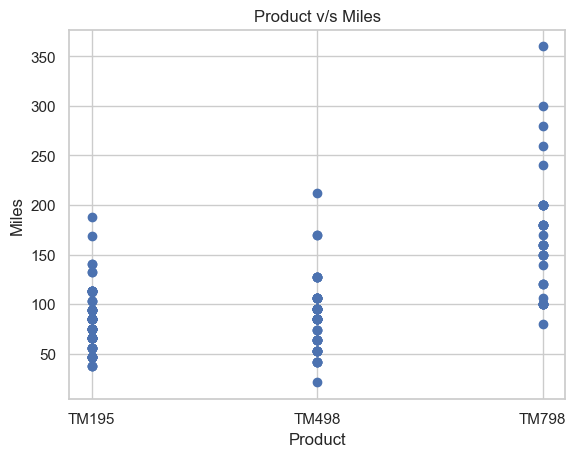

In [38]:
plt.scatter(df.Product, df.Miles)
plt.title("Product v/s Miles")
plt.xlabel("Product")
plt.ylabel("Miles")
plt.show()

* Customers who expect to run higher miles go for TM798.

## Product vs Marital Status

Text(0, 0.5, 'MaritalStatus')

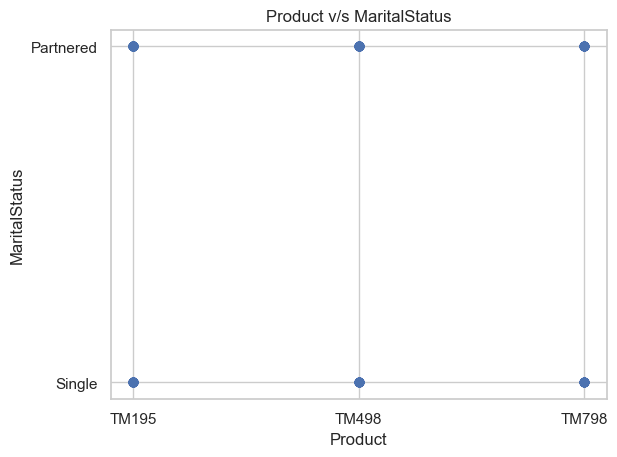

In [39]:
plt.scatter(x="Product", y="MaritalStatus", data=df)
plt.title("Product v/s MaritalStatus")
plt.xlabel("Product")
plt.ylabel("MaritalStatus")

* All the products are couple/partner friendly.
* Couples/partnered customers have a higher chance of buying a product when compared to single customers.

## Product vs Fitness

Text(0, 0.5, 'Fitness')

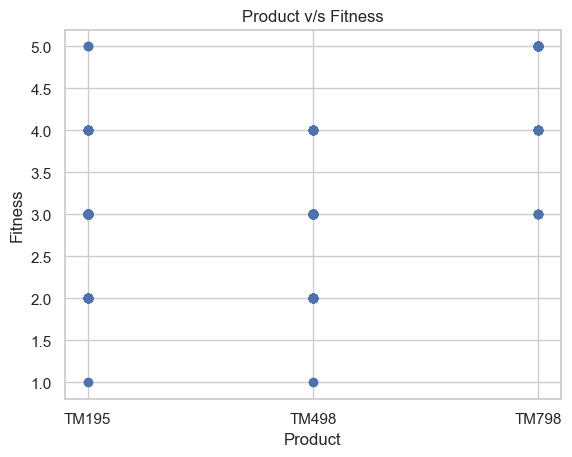

In [40]:
plt.scatter(x="Product", y="Fitness", data=df)
plt.title("Product v/s Fitness")
plt.xlabel("Product")
plt.ylabel("Fitness")

* Customers who purchased  TM195 and TM498 gave themselves a balanced fitness rating of 3  (on a scale of 5, 1 being the least fit and 5 being the most fit), but for TM798 most of customers have rated themselves higher in fitness that is 5.

### Grouping data w.r.t to products to build customer profiles

## Usage vs Gender vs Marital Status

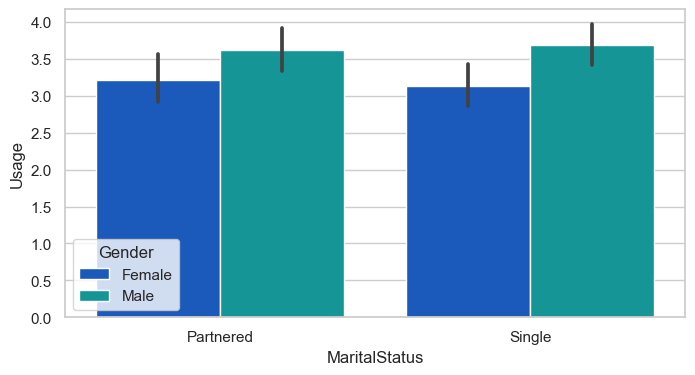

In [41]:

plt.figure(figsize=(8,4))
sns.barplot(x=df.MaritalStatus, y=df.Usage, hue=df.Gender, palette="winter")
plt.show()


* Usage for single females, single or partnered male is same it varies for females that have a partner.

## Gender vs Income

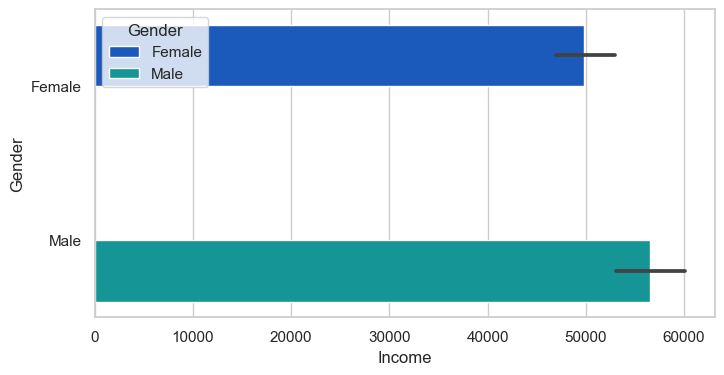

In [42]:
plt.figure(figsize=(8,4))
sns.barplot(x=df.Income, y=df.Gender, hue=df.Gender, palette="winter")
plt.show()

* There is a large disparity in income of both the genders, there are more males with higher income than females.

## Gender vs Income vs Marital Status

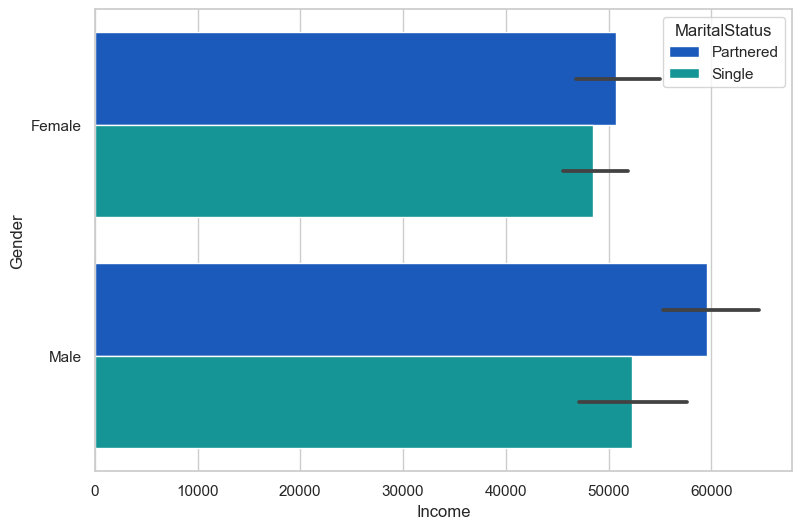

In [43]:
plt.figure(figsize=(9,6))
sns.barplot(x=df.Income, y=df.Gender, hue=df.MaritalStatus, palette="winter")
plt.show()

* Males with a partner have higher income, while the income for single and partnered females is almost compareable.

## Gender vs Miles

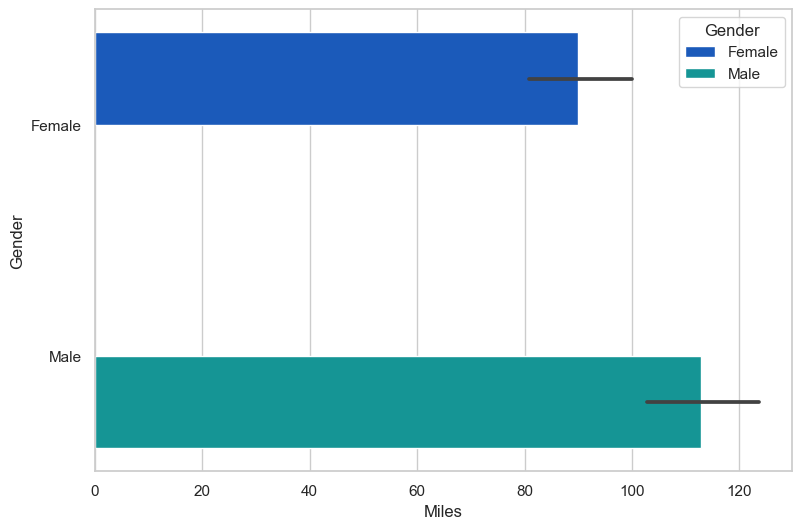

In [44]:
plt.figure(figsize=(9,6))
sns.barplot(x=df.Miles, y=df.Gender, hue=df.Gender, palette="winter")
plt.show()


* Males expect to run more miles than females

## Gender vs Miles vs Marital Status

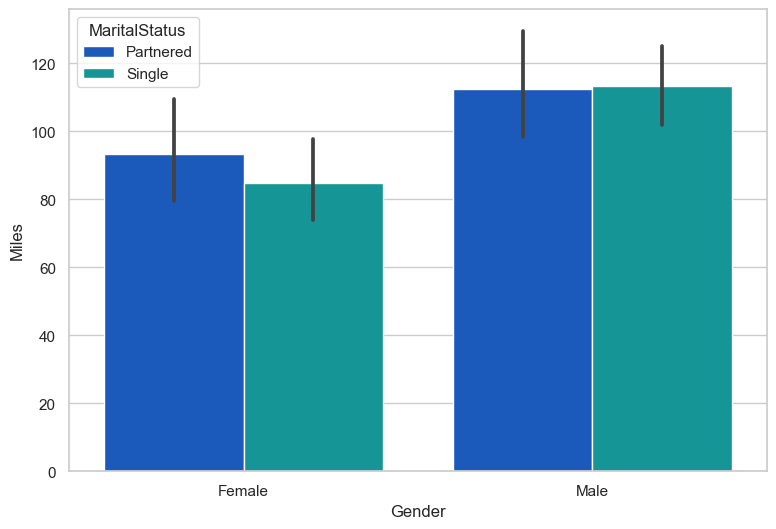

In [45]:
plt.figure(figsize=(9,6))
sns.barplot(x=df.Gender, y=df.Miles, hue=df.MaritalStatus, palette="winter")
plt.show()

* Single and Partnered male expect to run more miles, while not much difference can be noticed between Single or Partnered females.

## Gender vs Miles vs Education

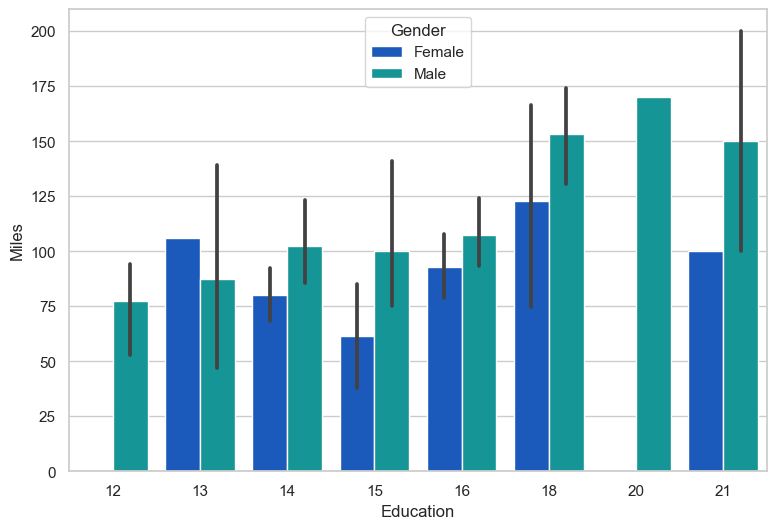

In [46]:
plt.figure(figsize=(9,6))
sns.barplot(x=df.Education, y=df.Miles, hue=df.Gender, palette="winter")
plt.show()

* The expected miles to run increases as the education level increases, indicating that the more educated customers are more fitness aware.

## Age vs Miles vs Gender

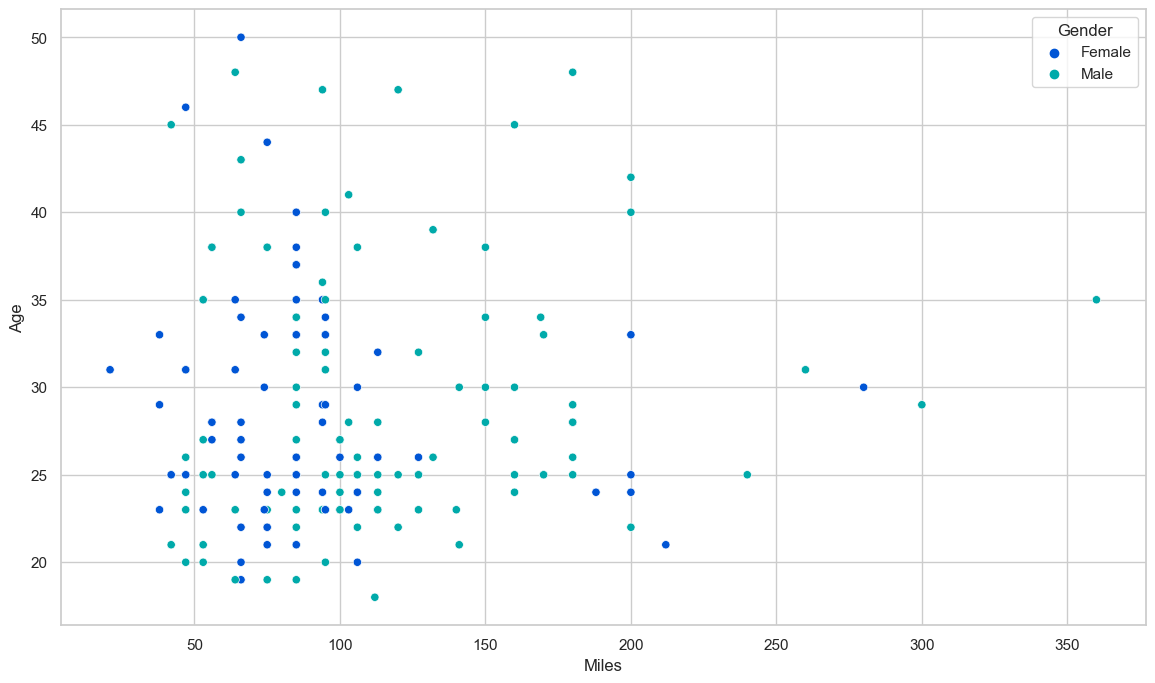

In [56]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=df.Miles, y=df.Age, hue=df.Gender, palette="winter")
plt.show()

* With the increase in age the average expected miles to run decreases in females, whereas for males it shows an increasing and decreasing trend.
* As the age increases above 25, males expect to run more miles than females.
* After 30 there is a sharp decrease in the Average miles a female expects to run.

## Age vs Miles vs Marital Status

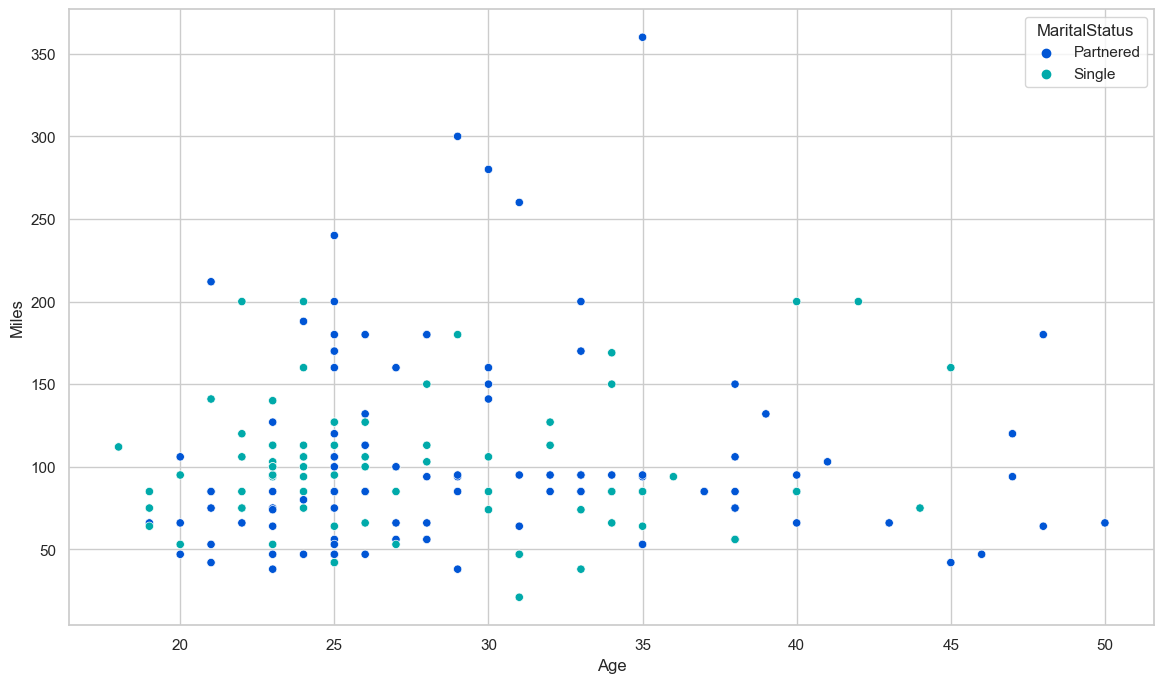

In [57]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=df.Age, y=df.Miles, hue=df.MaritalStatus, palette="winter")
plt.show()

* The trend is mostly similar across younger years for a single or a customer with a partner, however after 40 years singles tend to work more on their fitness.

In [49]:
df.dtypes

Product          category
Age                 int64
Gender           category
Education           int64
MaritalStatus    category
Usage               int64
Fitness          category
Income              int64
Miles               int64
dtype: object

## Income vs Miles vs Education

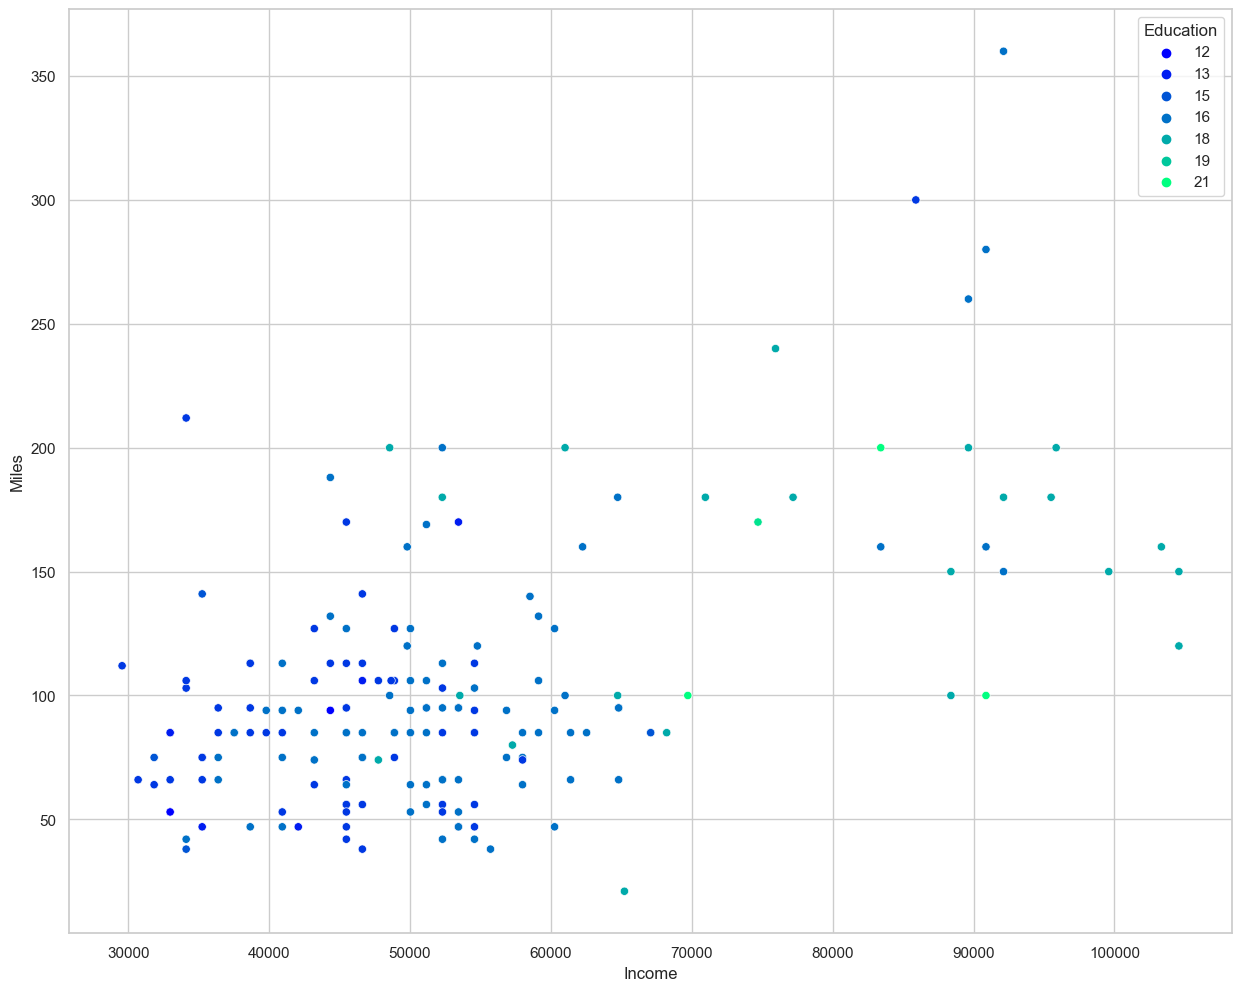

In [58]:
plt.figure(figsize=(15,12))
sns.scatterplot(x=df.Income, y=df.Miles, hue=df.Education, palette="winter")
plt.show()

*  Customers having an income of more than 70k have 18-21 years of education and expect to run 100-200 miles a week.

## Income vs Miles vs Product

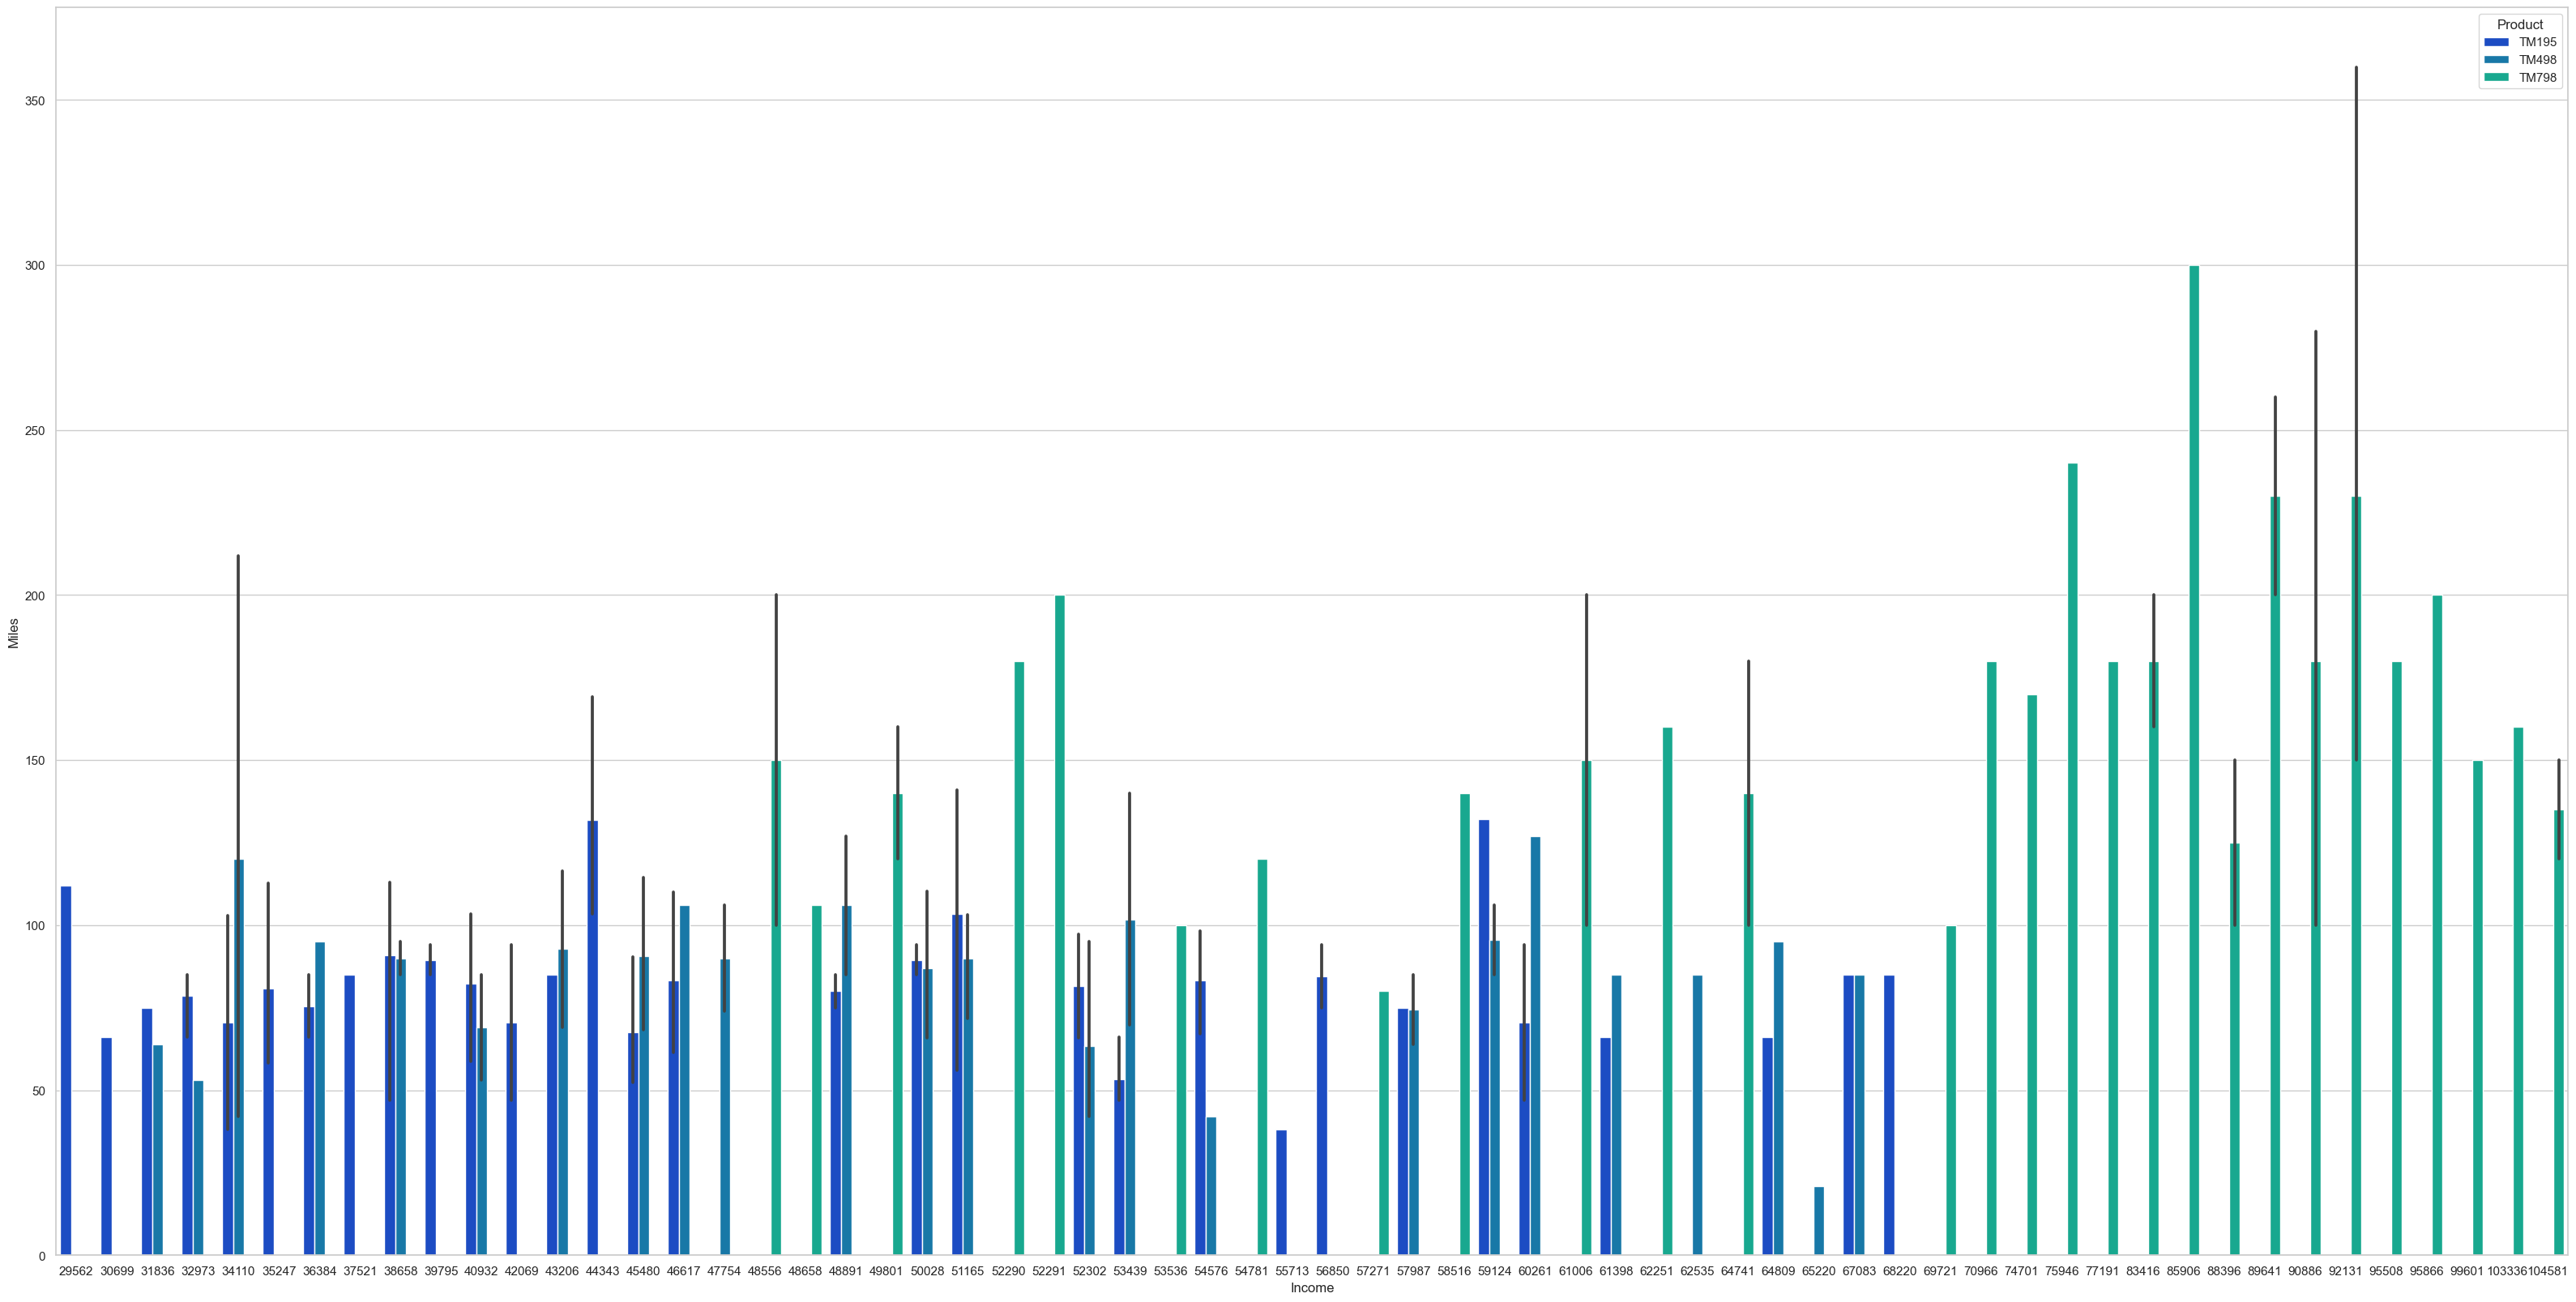

In [84]:
plt.figure(figsize=(40,20))
sns.barplot(x=df.Income, y=df.Miles, hue=df.Product, palette="winter")
plt.show()

* Customers having an income of more than 70k tend to buy TM798 and run more miles.

## Customer Profiles

In [82]:
product_profiles_mean = df[num_col].groupby(df['Product']).mean()#using group by on products to find the mean of each numerical column based on product
product_profiles_max = df[num_col].groupby(df['Product']).max()#using group by on products to find the maximum of each numerical column based on product
product_profiles_min = df[num_col].groupby(df['Product']).min()#using group by on products to find the miinimum of each numerical column based on product
product_profiles_median = df[num_col].groupby(df['Product']).median()#using group by on products to find the median of each numerical column based on product


marital_status_distribution = data.groupby('Product')['MaritalStatus'].value_counts(normalize=True)*100#using group by on products to find the unique values of martial status based on product
gender_distribution = df.groupby('Product')['Gender'].value_counts(normalize=True)*100#using group by on products to find the unique values of gender based on product
fitness_distribution = df.groupby('Product')['Fitness'].value_counts(normalize=True)*100#using group by on products to find the unique values of fitness based on product

In [72]:
product_profiles_mean

,Age,Education,Usage,Income,Miles
Product,,,,,
TM195,28.55,15.037500,3.087500,46418.025,82.787500
TM498,28.90,15.116667,3.066667,48973.650,87.933333
TM798,29.10,17.325000,4.775000,75441.575,166.900000


In [73]:
product_profiles_max

,Age,Education,Usage,Income,Miles
Product,,,,,
TM195,50,18,5,68220,188
TM498,48,18,5,67083,212
TM798,48,21,7,104581,360


In [74]:
product_profiles_min

,Age,Education,Usage,Income,Miles
Product,,,,,
TM195,18,12,2,29562,38
TM498,19,12,2,31836,21
TM798,22,14,3,48556,80


In [76]:
product_profiles_median

,Age,Education,Usage,Income,Miles
Product,,,,,
TM195,26.0,16.0,3.0,46617.0,85.0
TM498,26.0,16.0,3.0,49459.5,85.0
TM798,27.0,18.0,5.0,76568.5,160.0


In [77]:
marital_status_distribution

Product  MaritalStatus
TM195    Partnered        60.0
         Single           40.0
TM498    Partnered        60.0
         Single           40.0
TM798    Partnered        57.5
         Single           42.5
Name: proportion, dtype: float64

In [78]:
gender_distribution

Product  Gender
TM195    Female    50.000000
         Male      50.000000
TM498    Male      51.666667
         Female    48.333333
TM798    Male      82.500000
         Female    17.500000
Name: proportion, dtype: float64

In [81]:
fitness_distribution

Product  Fitness
TM195    3          67.500000
         2          17.500000
         4          11.250000
         5           2.500000
         1           1.250000
TM498    3          65.000000
         2          20.000000
         4          13.333333
         1           1.666667
         5           0.000000
TM798    5          72.500000
         4          17.500000
         3          10.000000
         1           0.000000
         2           0.000000
Name: proportion, dtype: float64

### TM195 Customer

TM195 is the most purchased product.
* They are used by customers of all ages but most of the customers are under the range of 20 and 30, with the average age being close to 29.
* The customer who bought this product have an income range of 29K-70K per annum which indicates that they are middle income customers, with an average income of 46K
* They also have an education ranging from 12 to 18 years with most of them having about 15.
* Customers who have light usage (greater than or equal 2 days but less than or equal to 5 days) prefer TM195, which is about thrice a week on an average.
* Customers who purchased  TM195 gave themselves majorly a fitness rating of 3  (on a scale of 5, 1 being the least fit and 5 being the most fit)
* These customers also covered about 38-188 miles.
* The customers are also mostly married (60%) and have an equal distribution gender.

### TM498 Customer

TM498 is the moderately purchased product.
* They are used by customers of all ages
* The customer who bought this product have an income range of 30-70K per annum which indicates that they are middle income customers.
* They also have an education ranging from 12 to 18
* Customers with very light usage (2 - 5 days) prefer TM498.
* The customers who used this product covered a range of 21-212 miles with an average of about 88 miles. This indicates that they are moderate to high users of this product. 
* Customers who purchased  TM498 gave themselves mostly a fitness rating of 3  (on a scale of 5, 1 being the least fit and 5 being the most fit)
* The customers are mostly married (60%) and are a majority of males with a contribution of 51.7%.

### TM798 Customer

TM798 is the least purchased product.
* They are used by customers of the age group between 22 & 38.
* The customers buying this product is noted to be of higher education & of high income bracket.
* Customers with higher education seems to prefer this product more.
* Customers with very high usage (3-7 days) prefer TM798.
* The miles covered by these customers ranges from 80 to 360 with an average of 167 which indicates that they regularly use the product.
* Customers who purchased  TM798 gave themselves a very high fitness rating of 5 
* The customers are mostly married (57.5%) and are perdominantly males (82.5%)

## Key insights



#### TM195

* The target audience for this product  is most likely the beginners or customer with light fitness goals. 
* It is suitable for individuals looking for basic features at an affordable price.
* It can be considered for younger individuals who are starting their fitness journey.

#### TM498

* The target audience for this product  is most likely the moderate users with possible 2-3 days of active use.
* It can be considered for younger individuals who are starting their fitness journey.

#### TM798

* The target audience for this product  is most likely more into fitness with more than 3 days on constant use.
* It is also noted that users who clock up more miles use this product.
* It can be considered for individuals between the age of 22 & 38.

### Business Recommendations

* A majority of the sales are from the TM195 treadmill. They can increase and look into other target audience for this product by cross-selling it with other products such as fitness wearables, workout gear or provide a subscription based service to motivate the users to focus more on their fitness and in turn buy more.
* Females that would be interested in moderate to low fitness can be recommended the TM195 product. This would increase its sales a lot more and the product cost can also be increased to provide more profit for the company if the demand for that product increases.
* Higher educated consumers may be recommended a more expensive model because years of education are correlated with income (TM798).
* Male partners tend to earn more money and anticipate traveling greater distances, so the higher-end TM798 product would be a wise choice for them.
* Individuals over 40 years old who want to run more miles and so have higher usage might be advised to get the higher-end model (TM798).
